In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nibabel as nib

import sys
repo_root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.insert(0,repo_root)

### Repository overview (figure 1)

### Example images (figure 2)

In [8]:
from utilities.data_simulation.Download_data import download_data
download_data()

Title: Data to https://github.com/OSIPI/TF2.4_IVIM-MRI_CodeCollection
Keywords: 
Publication date: 2025-01-06
DOI: 10.5281/zenodo.14605039
Total size: 245.1 MB

File: OSIPI_TF24_data_phantoms.zip (245.1 MB)
Link: https://zenodo.org/api/records/14605039/files/OSIPI_TF24_data_phantoms.zip/content
OSIPI_TF24_data_phantoms.zip is already downloaded correctly.

All specified files have been processed.


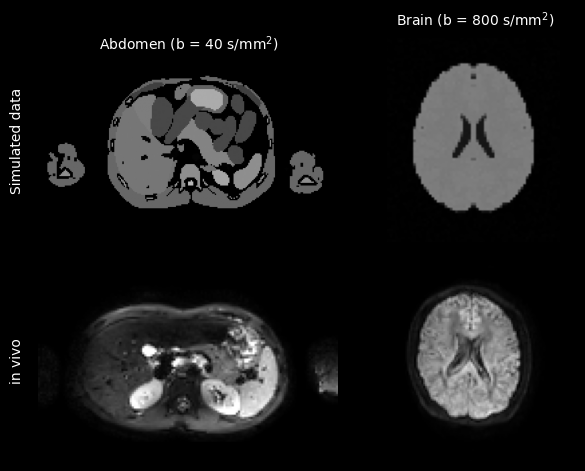

In [3]:
from phantoms.MR_XCAT_qMRI.sim_ivim_sig import phantom


fig,axess = plt.subplots(2,2)
for datasource,axes in zip(['Simulated data','in vivo'],axess):
    for region,ax in zip(['Abdomen','Brain'],axes):
        if datasource == 'Simulated data':
            if region == 'Abdomen':
                b = np.array([0,40])
                res = phantom(b,1/2000)
                im = np.flip(res[0],axis=0)
                s = 18
                idx = 1
                vmax = np.max(im)
            else:
                im_file = os.path.join(repo_root,'download','Phantoms','brain','data','diffusive_snr200.nii.gz')
                im = nib.load(im_file).get_fdata()
                b = np.loadtxt(im_file.replace('nii.gz','bval'))
                s = 31
                idx = -2
                vmax = np.max(im)
        else:
            im_file = os.path.join(repo_root,'download','Data',region.lower()+'.nii.gz')
            im = nib.load(im_file).get_fdata()
            b = np.loadtxt(im_file.replace('nii.gz','bval'))
            if region == 'Brain':
                s = 32
                idx = -8
                vmax = np.quantile(im,0.95)
            else:
                im = im[:,30:-30,:,:]
                s = 18
                idx = 2
                vmax = np.quantile(im,0.98)
    
        ax.imshow(np.rot90(im[:,:,s,idx]),cmap='gray',vmin=0,vmax=vmax)
        ax.axis('off')
        if ax == axes[0]:
            ax.text(-0.05*im.shape[0],0.5*im.shape[1],datasource,rotation=90,ha='right',va='center',color='w')
        if ax in axess[0]:
            ax.text(0.5*im.shape[0],-0.05*im.shape[1],f'{region} (b = {b[idx]:.0f} s/mm$^2$)',ha='center',va='bottom',color='w')
plt.tight_layout()
fig.set_facecolor('k')
fig.savefig(os.path.join('figs','fig2.png'),dpi=400);

### Code contributions

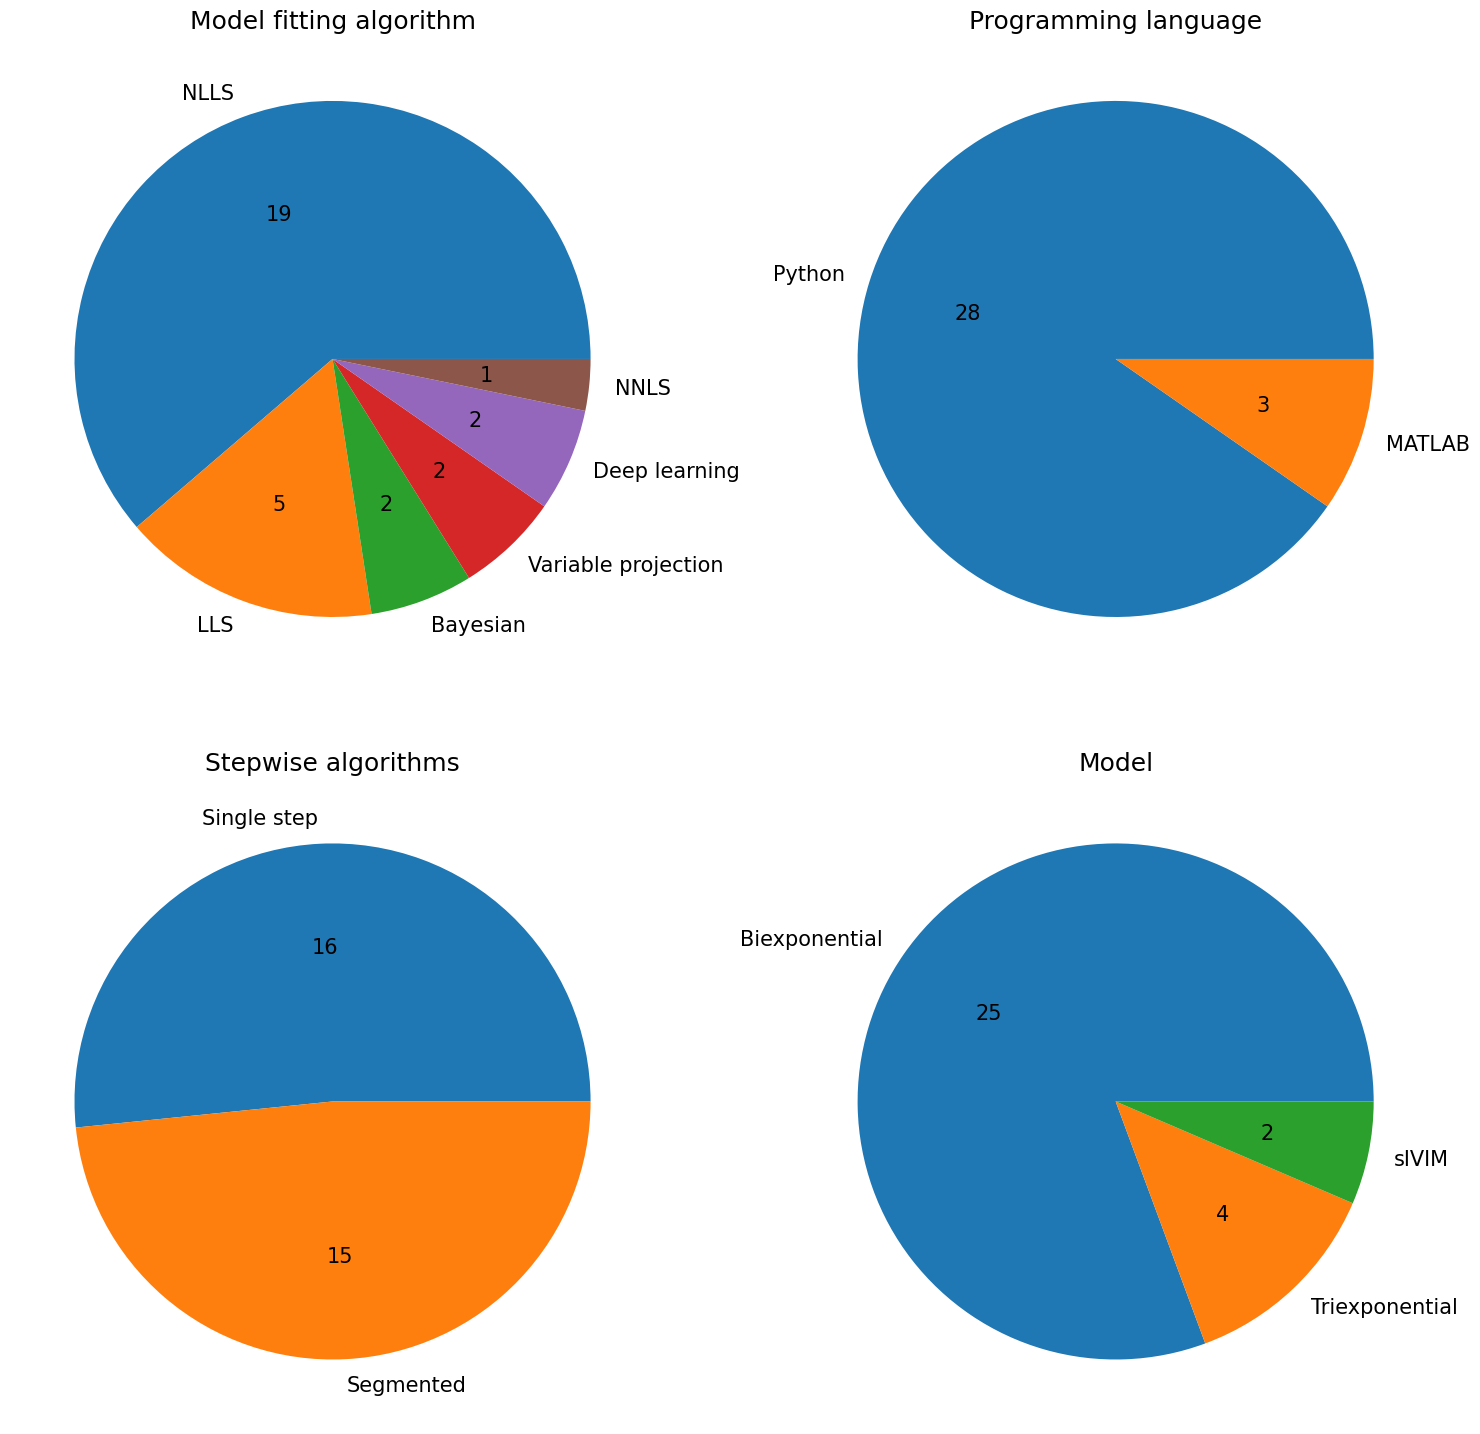

In [35]:

titles = ['Model fitting algorithm','Programming language','Stepwise algorithms','Model']
labelss = [['NLLS','LLS','Bayesian','Variable projection','Deep learning','NNLS'],['Python','MATLAB'],['Single step','Segmented'],['Biexponential','Triexponential','sIVIM']]
sizess = [[19,5,2,2,2,1],[28,3],[16,15],[25,4,2]]

colors = []

fig,axes = plt.subplots(2,2,figsize=(15,15))
for ax,title,labels,sizes in zip(axes.flatten(),titles,labelss,sizess):
    def absolute_value(val):
        a  = np.round(val/100.*np.sum(sizes), 0)
        return int(a)

    ax.pie(sizes,labels=labels,autopct=absolute_value,
           textprops={'fontsize':15})
    ax.set_title(title,fontsize=18)

plt.tight_layout()
fig.savefig(os.path.join('figs','fig3.png'),dpi=800);

### Example usage (figure 4)

In [12]:
from src.standardized.IAR_LU_biexp import IAR_LU_biexp

algorithm = IAR_LU_biexp()
algorithm.osipi_print_requirements()


### Algorithm requirements ###
Number of b-values: 4
Numer of b-value thresholds [at least, at most]: [0, 0]
Bounds required: False but is optional
Initial guess required: False but is optional


In [26]:
from utilities.data_simulation.GenerateData import GenerateData
from src.standardized.IAR_LU_biexp import IAR_LU_biexp

bvalues = [0.0, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50.0, 75.0, 100.0, 
            150.0, 250.0, 350.0, 400.0, 550.0, 700.0, 850.0, 1000.0]
data_generator = GenerateData()
signal = data_generator.ivim_signal(D=1e-3,Dp=10e-3,f=0.1,S0=1,
                                bvalues=bvalues,snr=30.0)

algorithm = IAR_LU_biexp()
fit = algorithm.ivim_fit(signal,bvalues)

In [ ]:
import os
import nibabel as nib

im_file = os.path.join(repo_root,'download','Data','abdomen.nii.gz')
im = nib.load(im_file).get_fdata()
bvalues_im = np.loadtxt(im_file.replace('.nii.gz','.bval'))

algorithm = IAR_LU_biexp()
fit_vol = algorithm.ivim_fit_full_volume(im,bvalues)

/home/oscar/programming/TF2.4_IVIM-MRI_CodeCollection/src/standardized/IAR_LU_biexp.py:114: UserWarning: Pass ['bvecs'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  gtab = gradient_table(bvalues, bves=bvec, b0_threshold=0)


KeyboardInterrupt: 

In [14]:
from src.standardized.IAR_LU_biexp import IAR_LU_biexp

algorithm = IAR_LU_biexp()
algorithm.osipi_simple_bias_and_RMSE_test(
    SNR=30.0,bvalues=bvalues,f=0.1,Dstar=10e-3,D=1e-3)

f bias:     0.02271    
f RMSE:     0.06734
Dstar bias: 0.0107
Dstar RMSE: 0.02565
D bias:     -1.948e-05    
D RMSE:     0.0001176


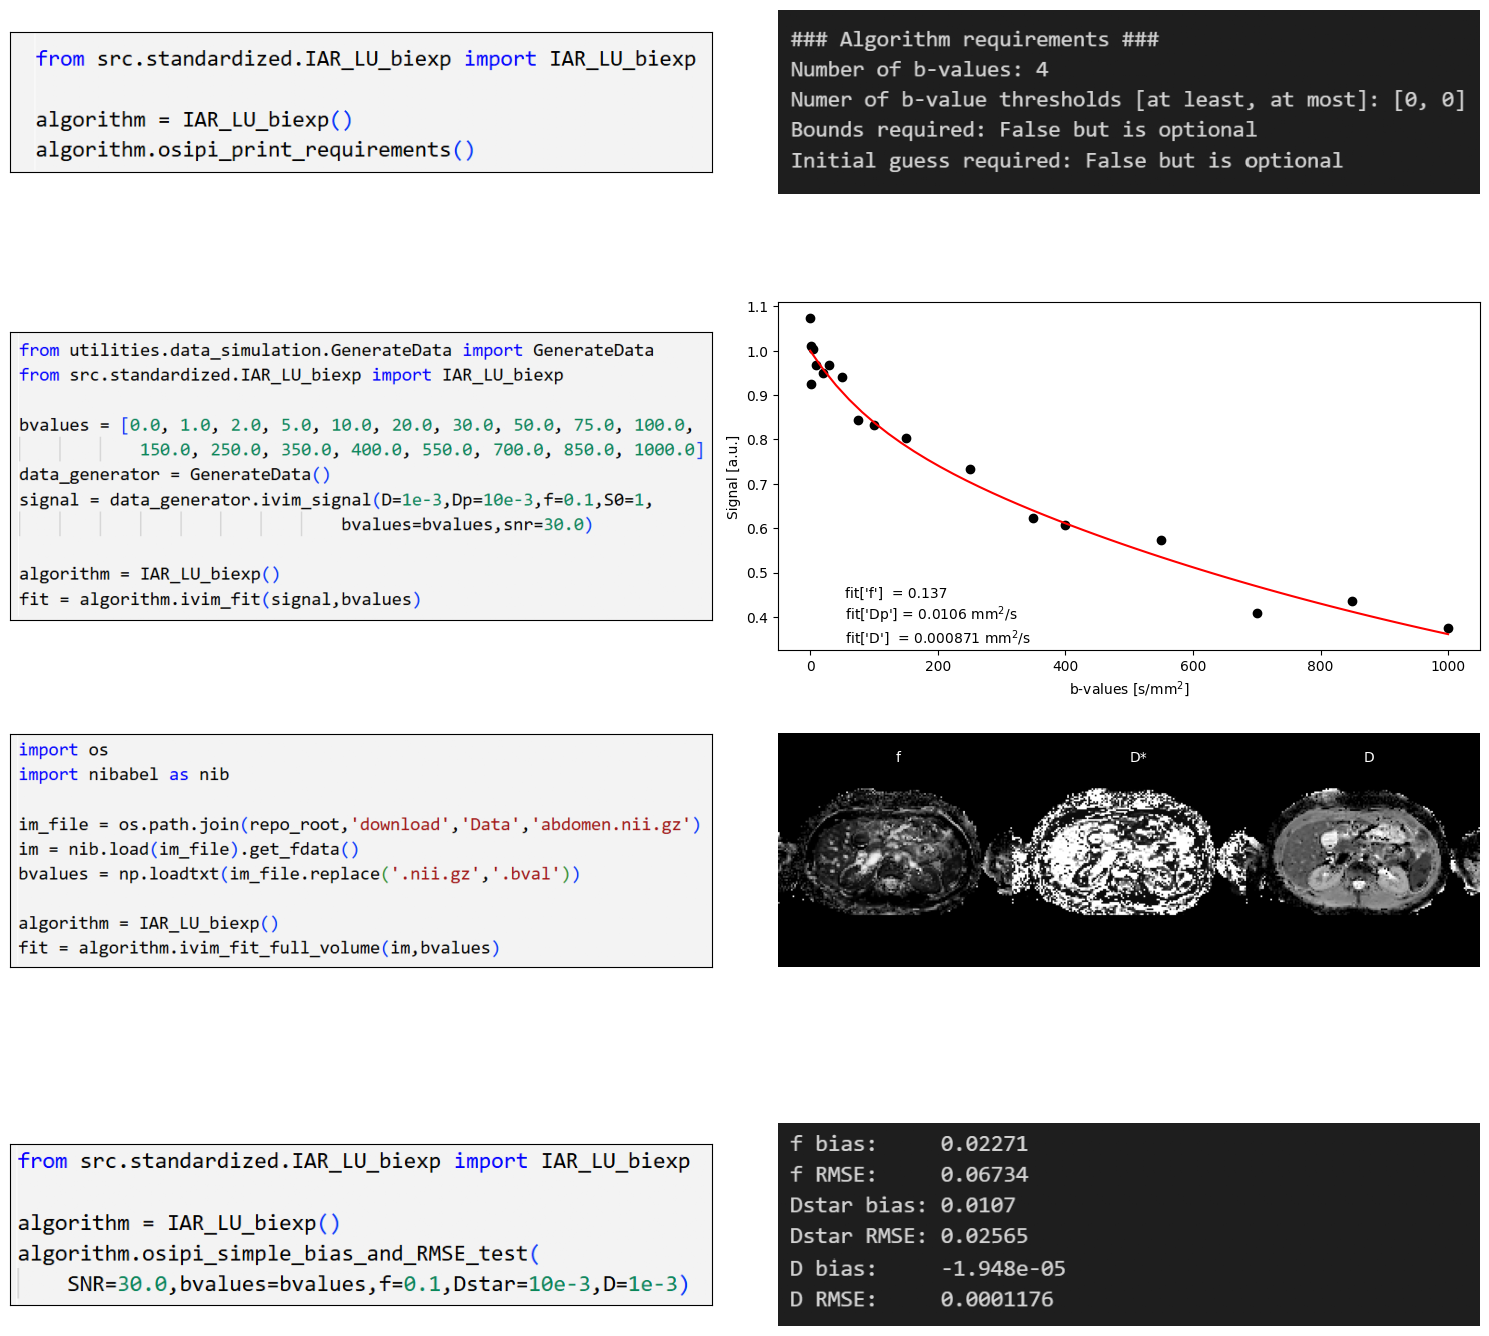

In [30]:
fig,axess = plt.subplots(4,2,figsize=(15,15))
for i,axes in enumerate(axess):
    output = ""
    if i == 0:
        output = mpimg.imread('dumps/output1.png')
        axes[1].imshow(output)
        axes[1].axis('off')

    elif i == 1:
        axes[1].plot(bvalues,signal,'ko',label='data')
        bplot = np.linspace(np.min(bvalues),np.max(bvalues))
        signalplot = data_generator.ivim_signal(D=fit['D'],Dp=fit['Dp'],f=fit['f'],
                                                S0=1,bvalues=bplot)
        axes[1].plot(bplot,signalplot,'r-',label='fit to data')
        fit_results = f"""
        fit['f']  = {fit['f']:.3}
        fit['Dp'] = {fit['Dp']:.3} mm$^2$/s 
        fit['D']  = {fit['D']:.3} mm$^2$/s
                      """
        axes[1].text(0,0.3,fit_results)
        axes[1].set_ylabel('Signal [a.u.]')
        axes[1].set_xlabel('b-values [s/mm$^2$]')

    elif i == 2:
        scale = {'f':1,'Dp':100e-3,'D':3e-3}
        sz = fit_vol['f'].shape
        parmaps = np.zeros((sz[1],3*sz[0]))
        for idx, par in enumerate(['f','Dp','D']):
            parmaps[:,idx*sz[0]:(idx+1)*sz[0]] = (np.rot90(fit_vol[par][:,:,10]))/scale[par]

        parmaps[np.tile(np.rot90(im[:,:,10,0]),(1,3))<=0] = 0


        axes[1].imshow(parmaps,cmap='gray',vmin=0,vmax=1)
        axes[1].axis('off')
        for idx, par in enumerate(['f','D*','D']):
            axes[1].text(sz[1]*(0.5+idx),0.1*sz[0],par,va='center',color='w')

    else: # i == 3
        output = mpimg.imread('dumps/output4.png')
        axes[1].imshow(output)
        axes[1].axis('off')

    cmd = mpimg.imread(f'dumps/cmd{i+1}.png')
    axes[0].imshow(cmd)

    for j,ax in enumerate(axes):
        if (i == 0) or (j==0) or (j==3):
            ax.set_xticks([])
            ax.set_yticks([])

plt.tight_layout()
fig.savefig(os.path.join('figs','fig4.png'),dpi=800);

### Test results (figure 5)

In [36]:
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))
os.system('python -m pytest --doctest-modules --junitxml=papers/paper1/test-results.xml --withmatlab')
os.chdir(os.path.join('papers','paper1'))

============================= test session starts ==============================
platform linux -- Python 3.10.14, pytest-8.4.1, pluggy-1.6.0
rootdir: /home/oscar/programming/TF2.4_IVIM-MRI_CodeCollection
configfile: pytest.ini
testpaths: tests
plugins: json-report-1.5.0, metadata-3.1.1
collected 1475 items / 513 deselected / 962 selected

tests/IVIMmodels/data/test_GenerateData.py .......................       [  2%]
tests/IVIMmodels/unit_tests/test_ivim_fit.py ........................... [  5%]
........................................................................ [ 12%]
........................................................................ [ 20%]
........................................................................ [ 27%]
........................................................................ [ 35%]
........................................................................ [ 42%]
........................................................................ [ 50%]
s.................

0

In [7]:
import xml.etree.ElementTree as ET

testresults_file = os.path.join('test-results.xml')
tree = ET.parse(testresults_file)
root = tree.getroot()

result = {}
ground_truth = {}

pars = ['f','D','Dp']
algorithms = [alg.replace('.py','') for alg in os.listdir(os.path.join('..','..','src','standardized')) if not alg.startswith('__')]

for par in pars:
    result[par] = {}
    ground_truth[par] = {}
    for algorithm in algorithms:
        result[par][algorithm] = []
        ground_truth[par][algorithm] = []

testsuite = root[0]
for child in testsuite:
    if child.attrib['classname'] == 'tests.IVIMmodels.unit_tests.test_ivim_fit':
        for cc in child:
            if len(cc) > 0:
                value = eval(cc[0].attrib['value'])
                for par in pars:
                    result[par][value['algorithm']].append(value[par+'_fit'])
                    ground_truth[par][value['algorithm']].append(value[par])

/tmp/ipykernel_440146/1363232976.py:28: RuntimeWarning: divide by zero encountered in divide
  yplot = tols['rtol'][par]*np.ones_like(xplot) + tols['atol'][par]/xplot
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


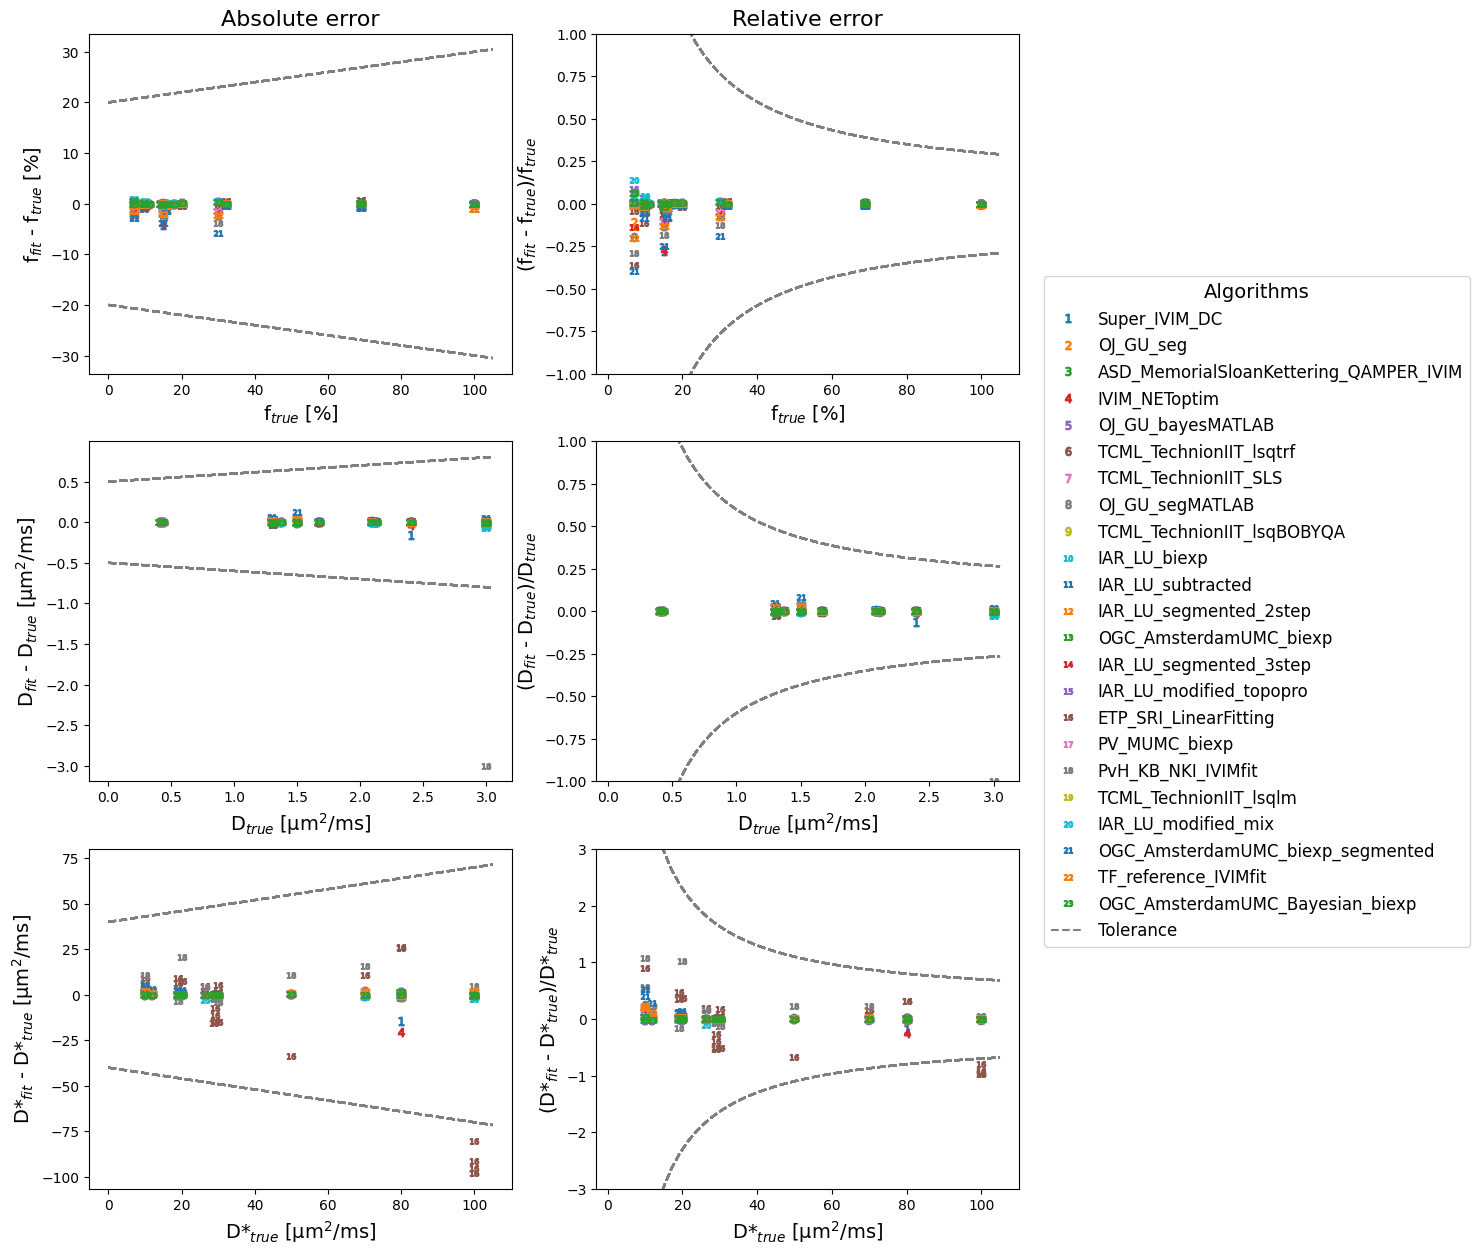

In [8]:
tols = {'rtol': {'f': 0.1, 'D': 0.1, 'Dp': 0.3}, 'atol': {'f': 0.2, 'D': 5e-4, 'Dp': 4e-2}}
scale = {'f':100,'D':1e3,'Dp':1e3}
units = {'f':'%','D':'µm$^2$/ms','Dp':'µm$^2$/ms'}
xlim = {'f':[-0.05,1.05],'D':[-0.05e-3,3.05e-3],'Dp':[-0.005,0.105]}
plot_pars = {'f':'f','D':'D','Dp':'D*'}
fig,axess = plt.subplots(3,2,figsize=(12,15))
for axes,par in zip(axess,pars):
    for a,ax in enumerate(axes):
        for idx,algorithm in enumerate(algorithms):
            x = np.array(ground_truth[par][algorithm])

            if par == 'D':
                mask = np.array(ground_truth['f'][algorithm]) < 0.8
            elif par == 'Dp':
                mask = np.array(ground_truth['f'][algorithm]) > 0.03
            else: 
                mask = np.array(ground_truth['f'][algorithm]) > 0.01
            res = np.array(result[par][algorithm])[mask]
            x = x[mask]
            xplot = np.linspace(0,xlim[par][1])
            if a == 0:
                y = res - x
                #y = x - res
                yplot = tols['atol'][par]*np.ones_like(xplot) + tols['rtol'][par]*xplot
            else:
                y = (res-x)/x
                #y = (x-res)/res
                yplot = tols['rtol'][par]*np.ones_like(xplot) + tols['atol'][par]/xplot
            
            if a == 0:
                y *= scale[par]
                yplot *= scale[par]

            ax.plot(x*scale[par],y,marker=f'${idx+1}$',linestyle='none',label=algorithm, mfc='none')

            for sign in [-1,1]:
                label = ''
                if (sign == -1) and (algorithm == algorithms[-1]):
                    label = 'Tolerance'
                ax.plot(xplot*scale[par],sign*yplot,'--',color='gray',label=label)
        if par == pars[0]:
            if a == 0:
                title = 'Absolute error'
            else:
                title = 'Relative error'
            ax.set_title(title,fontsize=16)
        elif par == pars[1]:
            if a == 1:
                ax.legend(bbox_to_anchor=(1.04,0.5),loc="center left",title='Algorithms',title_fontsize=14,fontsize=12)
        xlabel = f'{plot_pars[par]}' + '$_{true}$' + f' [{units[par]}]'
        ax.set_xlabel(xlabel,fontsize=14)

        if a == 0:
            ylabel = f'{plot_pars[par]}' + '$_{fit}$ - ' + f'{plot_pars[par]}' + '$_{true}$' + f' [{units[par]}]'
        else:
            ylabel = f'({plot_pars[par]}' + '$_{fit}$ - ' + f'{plot_pars[par]}' + '$_{true}$)/' + f'{plot_pars[par]}' + '$_{true}$'
        
        ax.set_ylabel(ylabel,fontsize=14)

        if a == 1:
            ax.set_ylim([-tols['rtol'][par]*10,tols['rtol'][par]*10])

fig.savefig(os.path.join('figs','fig5.eps'));